In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pl.read_csv("../data/selected_features_inflation.csv", infer_schema_length=10000, dtypes={"ANDENOx": pl.Float64})

display(df.head())

print("\nDataframe info:")
print(f"Shape: {df.shape}")
print(f"Column names: {df.columns}")
print(f"Data types:\n{df.dtypes}")

/var/folders/jb/ckb_b9f94m5dvhsy6d9bwn800000gn/T/ipykernel_43525/3781630620.py:1: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  df = pl.read_csv("../data/selected_features_inflation.csv", infer_schema_length=10000, dtypes={"ANDENOx": pl.Float64})


sasdate,CPIAUCSL_MOM,TOTRESNS_MOM,OILPRICEx_MOM,DDURRG3M086SBEA_YOY,DPCERA3M086SBEA_YOY,OILPRICEx_YOY,S&P PE ratio_MOM,AMDMUOx_YOY,ACOGNO_MOM,CES3000000008_YOY,CES0600000007,W875RX1_MOM,IPB51222S,TWEXAFEGSMTHx_MOM,IPNMAT_MOM,RPI_YOY,BUSINVx_MOM,WPSFD49207_MOM,ANDENOx_MOM,CLAIMSx_MOM,WPSID62_MOM,PERMITNE,CUSR0000SAD_YOY,CPITRNSL_MOM,UEMP15T26_MOM,EXSZUSx_MOM
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64
"""1959-01-01""",null,null,null,null,null,null,null,null,null,null,39.8,null,19.9173,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1959-02-01""",-0.034471,-1.587302,0.0,null,null,null,-0.149749,null,null,null,39.7,0.362737,19.8631,null,1.751079,null,0.344274,0.302115,null,-2.78963,-0.632911,null,null,0.341297,-8.249158,0.025509
"""1959-03-01""",-0.103448,-1.075269,-1.0,null,null,null,3.155764,null,null,null,40.0,0.735173,19.9986,null,1.502019,null,0.514639,0.0,null,-7.991292,0.318471,null,null,0.680272,-2.752294,0.220249
"""1959-04-01""",0.034518,1.630435,0.0,null,null,null,1.440165,null,null,null,40.2,0.705345,20.0799,null,3.09727,null,1.342587,0.0,null,-5.351724,0.634921,null,null,0.337838,-23.018868,-0.004627
"""1959-05-01""",0.207039,-0.534759,0.0,null,null,null,1.147522,null,null,null,40.3,0.663968,20.3779,null,0.898387,null,0.572583,0.301205,null,0.218738,-0.630915,null,null,0.0,-4.411765,0.004627



Dataframe info:
Shape: (793, 27)
Column names: ['sasdate', 'CPIAUCSL_MOM', 'TOTRESNS_MOM', 'OILPRICEx_MOM', 'DDURRG3M086SBEA_YOY', 'DPCERA3M086SBEA_YOY', 'OILPRICEx_YOY', 'S&P PE ratio_MOM', 'AMDMUOx_YOY', 'ACOGNO_MOM', 'CES3000000008_YOY', 'CES0600000007', 'W875RX1_MOM', 'IPB51222S', 'TWEXAFEGSMTHx_MOM', 'IPNMAT_MOM', 'RPI_YOY', 'BUSINVx_MOM', 'WPSFD49207_MOM', 'ANDENOx_MOM', 'CLAIMSx_MOM', 'WPSID62_MOM', 'PERMITNE', 'CUSR0000SAD_YOY', 'CPITRNSL_MOM', 'UEMP15T26_MOM', 'EXSZUSx_MOM']
Data types:
[String, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Int64, Float64, Float64, Float64, Float64]


In [3]:
df_with_lag = df.with_columns([
    pl.col(col).shift(lag).alias(f"{col}_lag{lag}") 
    for col in df.columns 
    if col != "sasdate"
    for lag in range(1, 3)  # Create lags 1 through 5
])

df_with_lag

sasdate,CPIAUCSL_MOM,TOTRESNS_MOM,OILPRICEx_MOM,DDURRG3M086SBEA_YOY,DPCERA3M086SBEA_YOY,OILPRICEx_YOY,S&P PE ratio_MOM,AMDMUOx_YOY,ACOGNO_MOM,CES3000000008_YOY,CES0600000007,W875RX1_MOM,IPB51222S,TWEXAFEGSMTHx_MOM,IPNMAT_MOM,RPI_YOY,BUSINVx_MOM,WPSFD49207_MOM,ANDENOx_MOM,CLAIMSx_MOM,WPSID62_MOM,PERMITNE,CUSR0000SAD_YOY,CPITRNSL_MOM,UEMP15T26_MOM,EXSZUSx_MOM,CPIAUCSL_MOM_lag1,CPIAUCSL_MOM_lag2,TOTRESNS_MOM_lag1,TOTRESNS_MOM_lag2,OILPRICEx_MOM_lag1,OILPRICEx_MOM_lag2,DDURRG3M086SBEA_YOY_lag1,DDURRG3M086SBEA_YOY_lag2,DPCERA3M086SBEA_YOY_lag1,DPCERA3M086SBEA_YOY_lag2,…,AMDMUOx_YOY_lag2,ACOGNO_MOM_lag1,ACOGNO_MOM_lag2,CES3000000008_YOY_lag1,CES3000000008_YOY_lag2,CES0600000007_lag1,CES0600000007_lag2,W875RX1_MOM_lag1,W875RX1_MOM_lag2,IPB51222S_lag1,IPB51222S_lag2,TWEXAFEGSMTHx_MOM_lag1,TWEXAFEGSMTHx_MOM_lag2,IPNMAT_MOM_lag1,IPNMAT_MOM_lag2,RPI_YOY_lag1,RPI_YOY_lag2,BUSINVx_MOM_lag1,BUSINVx_MOM_lag2,WPSFD49207_MOM_lag1,WPSFD49207_MOM_lag2,ANDENOx_MOM_lag1,ANDENOx_MOM_lag2,CLAIMSx_MOM_lag1,CLAIMSx_MOM_lag2,WPSID62_MOM_lag1,WPSID62_MOM_lag2,PERMITNE_lag1,PERMITNE_lag2,CUSR0000SAD_YOY_lag1,CUSR0000SAD_YOY_lag2,CPITRNSL_MOM_lag1,CPITRNSL_MOM_lag2,UEMP15T26_MOM_lag1,UEMP15T26_MOM_lag2,EXSZUSx_MOM_lag1,EXSZUSx_MOM_lag2
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
"""1959-01-01""",null,null,null,null,null,null,null,null,null,null,39.8,null,19.9173,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1959-02-01""",-0.034471,-1.587302,0.0,null,null,null,-0.149749,null,null,null,39.7,0.362737,19.8631,null,1.751079,null,0.344274,0.302115,null,-2.78963,-0.632911,null,null,0.341297,-8.249158,0.025509,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,39.8,null,null,null,19.9173,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1959-03-01""",-0.103448,-1.075269,-1.0,null,null,null,3.155764,null,null,null,40.0,0.735173,19.9986,null,1.502019,null,0.514639,0.0,null,-7.991292,0.318471,null,null,0.680272,-2.752294,0.220249,-0.034471,null,-1.587302,null,0.0,null,null,null,null,null,…,null,null,null,null,null,39.7,39.8,0.362737,null,19.8631,19.9173,null,null,1.751079,null,null,null,0.344274,null,0.302115,null,null,null,-2.78963,null,-0.632911,null,null,null,null,null,0.341297,null,-8.249158,null,0.025509,null
"""1959-04-01""",0.034518,1.630435,0.0,null,null,null,1.440165,null,null,null,40.2,0.705345,20.0799,null,3.09727,null,1.342587,0.0,null,-5.351724,0.634921,null,null,0.337838,-23.018868,-0.004627,-0.103448,-0.034471,-1.075269,-1.587302,-1.0,0.0,null,null,null,null,…,null,null,null,null,null,40.0,39.7,0.735173,0.362737,19.9986,19.8631,null,null,1.502019,1.751079,null,null,0.514639,0.344274,0.0,0.302115,null,null,-7.991292,-2.78963,0.318471,-0.632911,null,null,null,null,0.680272,0.341297,-2.752294,-8.249158,0.220249,0.025509
"""1959-05-01""",0.207039,-0.534759,0.0,null,null,null,1.147522,null,null,null,40.3,0.663968,20.3779,null,0.898387,null,0.572583,0.301205,null,0.218738,-0.630915,null,null,0.0,-4.411765,0.004627,0.034518,-0.103448,1.630435,-1.075269,0.0,-1.0,null,null,null,null,…,null,null,null,null,null,40.2,40.0,0.705345,0.735173,20.0799,19.9986,null,null,3.09727,1.502019,null,null,1.342587,0.514639,0.0,0.0,null,null,-5.351724,-7.991292,0.634921,0.318471,null,null,null,null,0.337838,0.680272,-23.018868,-2.752294,-0.004627,0.220249
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…

In [4]:
import datetime

post_2008_df = df_with_lag.filter(
    pl.col("sasdate").str.strptime(pl.Date, "%Y-%m-%d") >= datetime.date(2008, 1, 1)
)

filtered_df = df_with_lag.with_columns(
    pl.col("sasdate").str.strptime(pl.Date, "%Y-%m-%d").alias("date")
).filter(
    (pl.col("date") >= datetime.date(1970, 1, 1)) & 
    (pl.col("date") <= datetime.date(2005, 12, 31))
)

## Decision Tree and Random Forrest Regressor

In [5]:
target = "CPIAUCSL_MOM"
lag_cols = [col for col in post_2008_df.columns if any(col.endswith(f"_lag{i}") for i in range(1, 2)) and not col.startswith(f"{target}_lag")]

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filtered_df_pd = filtered_df.to_pandas().dropna(subset=lag_cols + [target])

X = filtered_df_pd[lag_cols]
y = filtered_df_pd[target]

min_rows = min(len(X), len(y))
X = X.iloc[:min_rows]
y = y.iloc[:min_rows]


# Create and fit the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X, y)

# Make predictions
y_pred = dt_regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R² Score: {r2:.6f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 most important features:")
display(feature_importance.head(10))


Decision Tree Regressor Performance:
Mean Squared Error: 0.000000
Root Mean Squared Error: 0.000000
R² Score: 1.000000

Top 10 most important features:


,Feature,Importance
1,OILPRICEx_MOM_lag1,0.258959
22,CPITRNSL_MOM_lag1,0.164906
16,WPSFD49207_MOM_lag1,0.137073
4,OILPRICEx_YOY_lag1,0.089680
3,DPCERA3M086SBEA_YOY_lag1,0.044974
23,UEMP15T26_MOM_lag1,0.044270
24,EXSZUSx_MOM_lag1,0.042145
15,BUSINVx_MOM_lag1,0.037484
7,ACOGNO_MOM_lag1,0.034479
10,W875RX1_MOM_lag1,0.033944


In [7]:
X_test = post_2008_df[lag_cols]
y_test = post_2008_df[target]
y_pred_test = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f"Decision Tree Regressor Performance:")
print(f"Mean Squared Error: {mse:.6f}")
print(f"Root Mean Squared Error: {rmse:.6f}")
print(f"R² Score: {r2:.6f}")


Decision Tree Regressor Performance:
Mean Squared Error: 0.135427
Root Mean Squared Error: 0.368004
R² Score: -0.340700


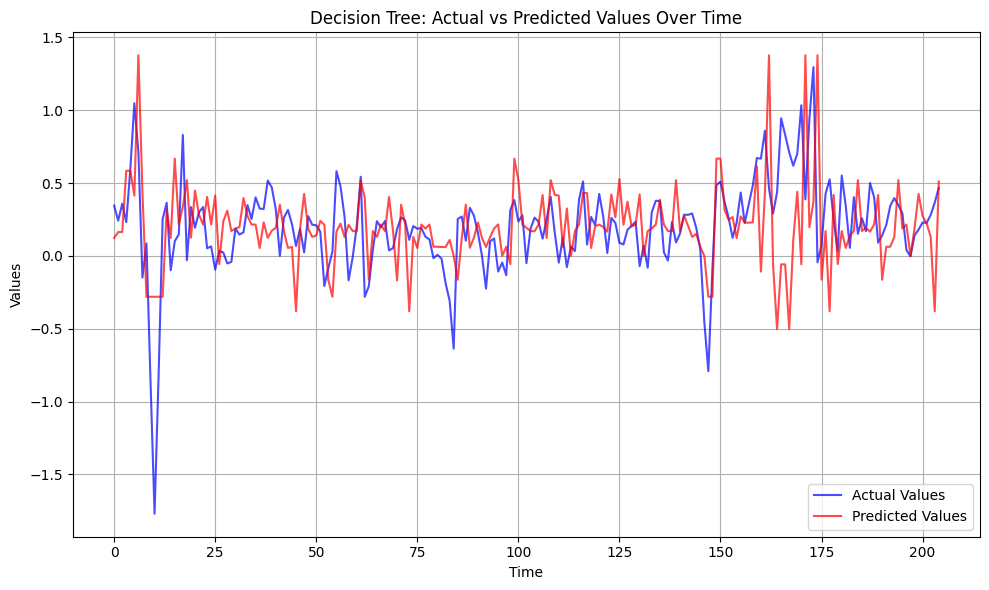

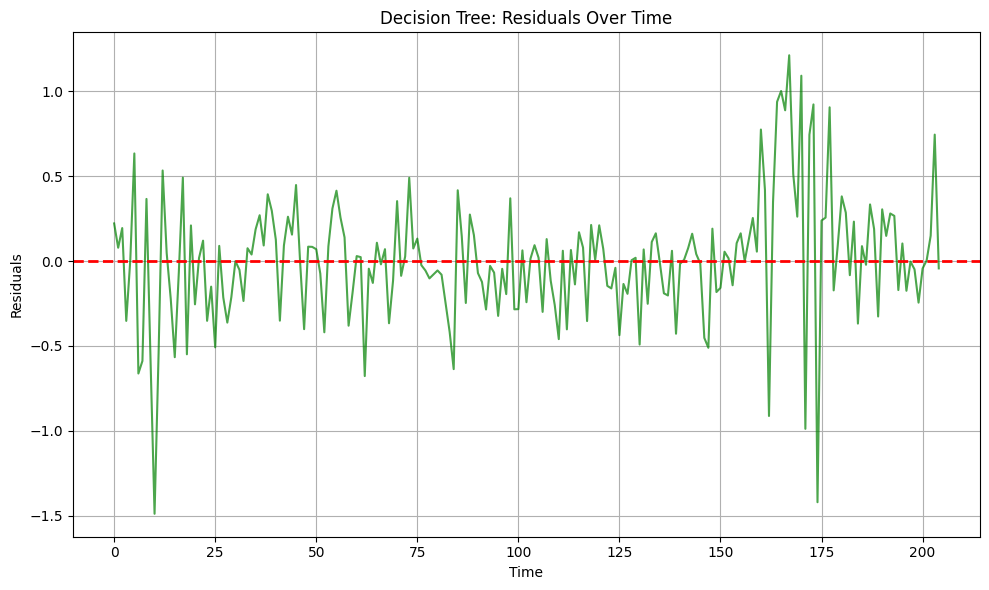

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a time series plot with actual and predicted values
plt.figure(figsize=(10, 6))

# Assuming y_test has a time index, otherwise we'll need to create one
# If y_test is a Series with DatetimeIndex, this will work directly
# Otherwise, we need to convert indices to a time-like sequence
if hasattr(y_test, 'index') and isinstance(y_test.index, pd.DatetimeIndex):
    x_values = y_test.index
else:
    # Create a sequential index if no datetime index exists
    x_values = range(len(y_test))

# Plot both actual and predicted values as lines
plt.plot(x_values, y_test, 'b-', label='Actual Values', alpha=0.7)
plt.plot(x_values, y_pred_test, 'r-', label='Predicted Values', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Decision Tree: Actual vs Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot residuals over time
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.plot(x_values, residuals, 'g-', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residuals Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


## Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

print("Implementing Random Forest with regularization to reduce overfitting")

# Define the Random Forest model with parameters that help prevent overfitting
rf_regressor = RandomForestRegressor(
    random_state=42,
    max_depth=7,              
    min_samples_split=5,      
    min_samples_leaf=4,      
    max_features='sqrt',      
    n_estimators=100          
)

# Train the model
rf_regressor.fit(X, y)

y_pred_train = rf_regressor.predict(X)
train_mse = mean_squared_error(y, y_pred_train)
train_r2 = r2_score(y, y_pred_train)

print("\nRandom Forest Performance:")
print(f"Training MSE: {train_mse:.6f}, R²: {train_r2:.6f}")

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

Implementing Random Forest with regularization to reduce overfitting

Random Forest Performance:
Training MSE: 0.015135, R²: 0.620346


In [10]:
y_pred_test = rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred_test)

print("\nRandom Forest Performance:")
print(f"Test MSE: {test_mse:.6f}, R²: {test_r2:.6f}")
print(f"Test RMSE: {rmse:.6f}")


Random Forest Performance:
Test MSE: 0.078812, R²: 0.219771
Test RMSE: 0.280736


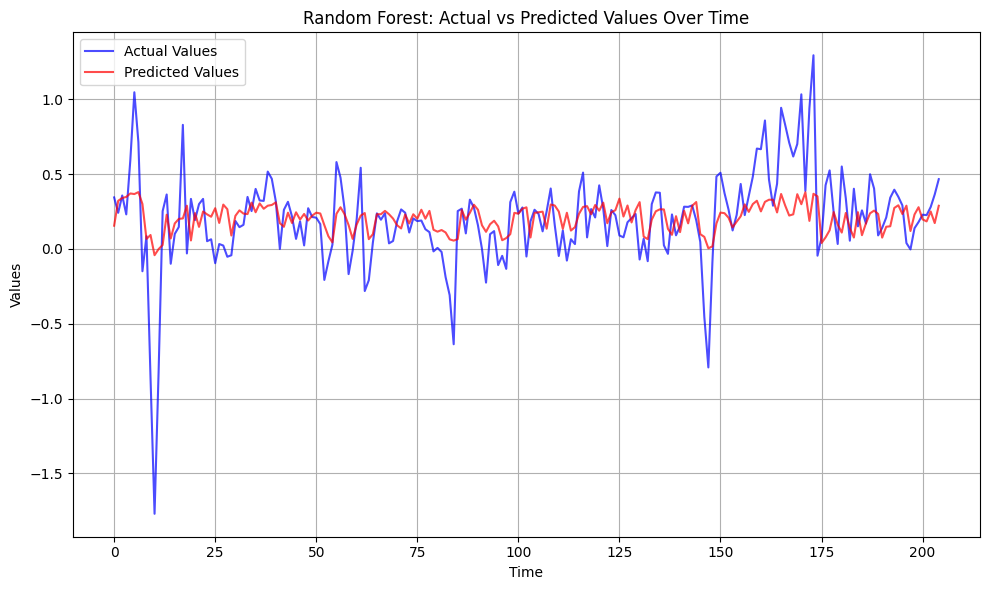

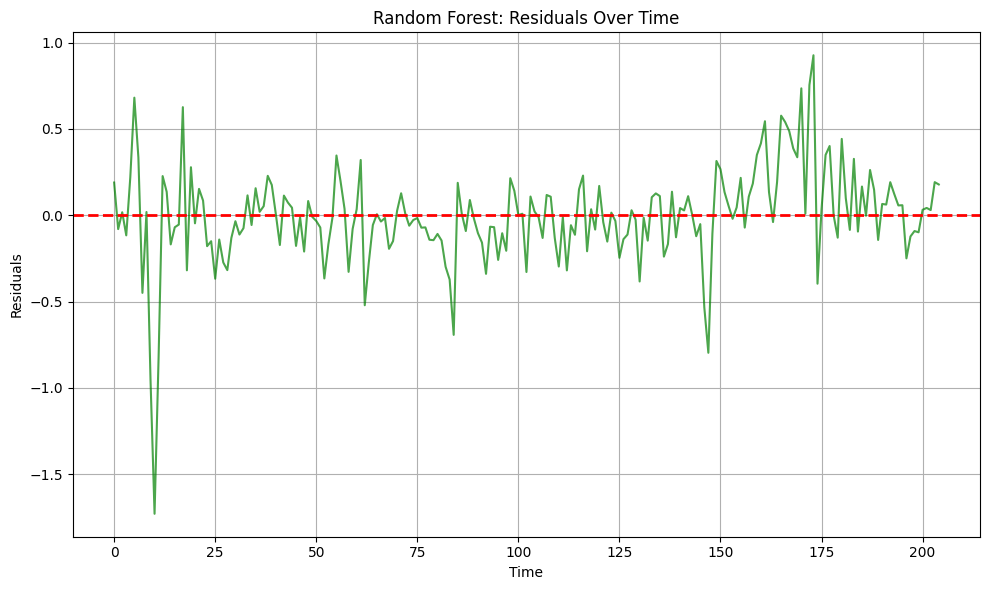

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))


if hasattr(y_test, 'index') and isinstance(y_test.index, pd.DatetimeIndex):
    x_values = y_test.index
else:
    # Create a sequential index if no datetime index exists
    x_values = range(len(y_test))

# Plot both actual and predicted values as lines
plt.plot(x_values, y_test, 'b-', label='Actual Values', alpha=0.7)
plt.plot(x_values, y_pred_test, 'r-', label='Predicted Values', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Random Forest: Actual vs Predicted Values Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot residuals over time
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.plot(x_values, residuals, 'g-', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("\nTop 10 most important features (Random Forest):")
display(rf_feature_importance.head(20))

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

print("Performing Recursive Feature Elimination with Cross-Validation (RFECV)")

rf_for_rfe = RandomForestRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    n_estimators=100
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=rf_for_rfe,
    step=1,
    cv=cv,
    scoring='r2',
    min_features_to_select=1,
    n_jobs=-1,
    verbose=1
)

# Fit RFECV
rfecv.fit(X, y)

# Print results
print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"Best R² score: {rfecv.cv_results_['mean_test_score'].max():.6f}")

# Get selected features
selected_features = X.columns[rfecv.support_]
print(f"\nSelected features ({len(selected_features)}):")
for feature in selected_features:
    print(f"- {feature}")

# Plot number of features vs. R²
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'], 'o-')
plt.xlabel('Number of Features')
plt.ylabel('R² Score (Cross-Validation)')
plt.title('R² Score vs Number of Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_selected = X[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    n_estimators=100
)

rf_selected.fit(X_selected, y)

# Evaluate on training data
y_pred_train_selected = rf_selected.predict(X_selected)
train_mse_selected = mean_squared_error(y, y_pred_train_selected)
train_r2_selected = r2_score(y, y_pred_train_selected)

# Evaluate on test data
y_pred_test_selected = rf_selected.predict(X_test_selected)
test_mse_selected = mean_squared_error(y_test, y_pred_test_selected)
test_r2_selected = r2_score(y_test, y_pred_test_selected)

print("\nRandom Forest with Selected Features Performance:")
print(f"Training - MSE: {train_mse_selected:.6f}, R²: {train_r2_selected:.6f}")
print(f"Test     - MSE: {test_mse_selected:.6f}, R²: {test_r2_selected:.6f}")

# Compare with original model
print("\nPerformance Comparison:")
print(f"Original Model - Test R²: {test_r2:.6f}")
print(f"Selected Features Model - Test R²: {test_r2_selected:.6f}")
print(f"Difference: {test_r2_selected - test_r2:.6f}")

# Feature importance for the selected model
rf_selected_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_selected.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature importance with selected features:")
display(rf_selected_importance)
